# URALS in rubles (and petroleum and diesel - will be)

In [3]:
import pandas as pd
import sqlite3

import sqlalchemy as sa
import matplotlib.pyplot as plt
from datetime import datetime, date

%run '../serv_energy.py'
eng_co=sa.create_engine('sqlite+pysqlite:///fuels.sqlite3') #, echo=True)

/home/egor/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


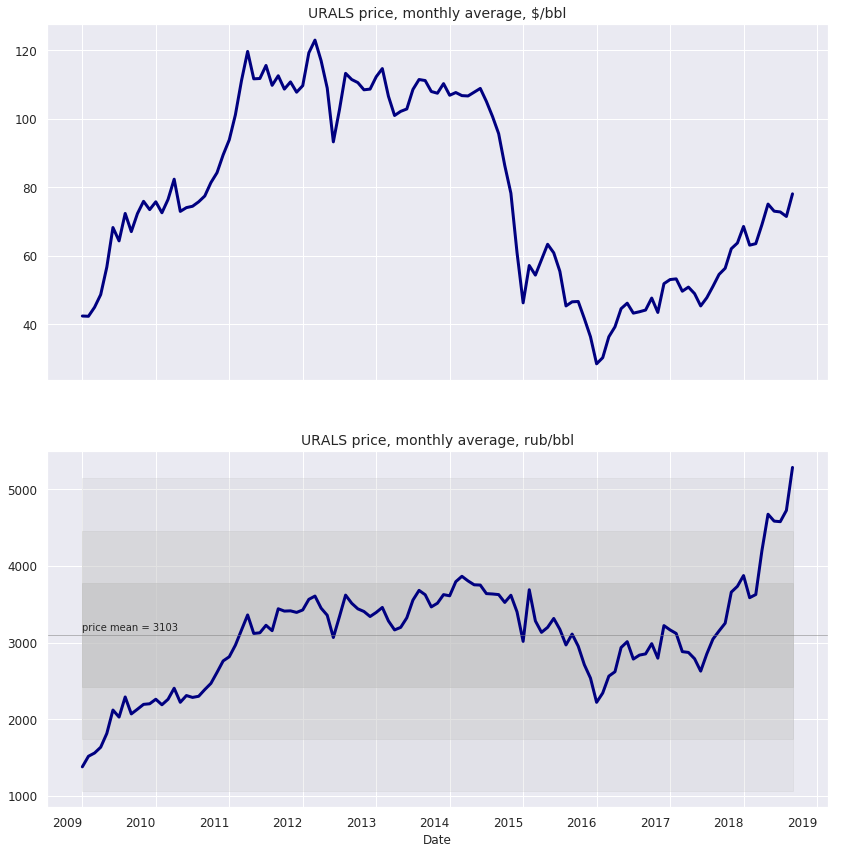

In [4]:
%matplotlib inline

import seaborn as sns
sns.set()

fig, ax=plt.subplots(figsize=(14,16))
pdfUR=pd.read_sql('select * from URALS_RUB', eng_co).set_index('Date').rename(columns={'price_rub':'URALS, RUB/bbl'})
#print(pdfUR)
#pdfUR=pd.read_sql('select * from URALS', eng_co).set_index('Date').rename(columns={'Price':'URALS, $/bbl'})
pdfUR=FuelsDataFrame(pdfUR)
pdfUR.index_to_datetime()
#print(pdfUR)
axB, axU=pdfUR.plot.line(ax=ax, grid=True, legend=False, color='navy', lw=3, fontsize=12, 
                         sharex=True, subplots=True, rot=0)
lM=int(pdfUR['URALS, RUB/bbl'].mean()) #pdfUR.loc[date(2011,1,1):date(2017,12,31)].mean()
lS=int(pdfUR['URALS, RUB/bbl'].std())
axU.axhline(y=lM, color='grey', linewidth=0.5)
axU.annotate('price mean = {}'.format(int(lM)), xy=(date(2009,1,1), lM+50), fontsize=10)

axU.fill_between(pdfUR.index, lM-lS, y2=lM+lS, alpha=0.5, color='silver')
axU.fill_between(pdfUR.index, lM-2*lS, y2=lM+2*lS, alpha=0.3, color='silver')
axU.fill_between(pdfUR.index, lM-3*lS, y2=lM+3*lS, alpha=0.2, color='silver')

axU.set_title('URALS price, monthly average, rub/bbl', fontsize=14)
axB.set_title('URALS price, monthly average, $/bbl', fontsize=14)

plt.show();


/home/egor/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


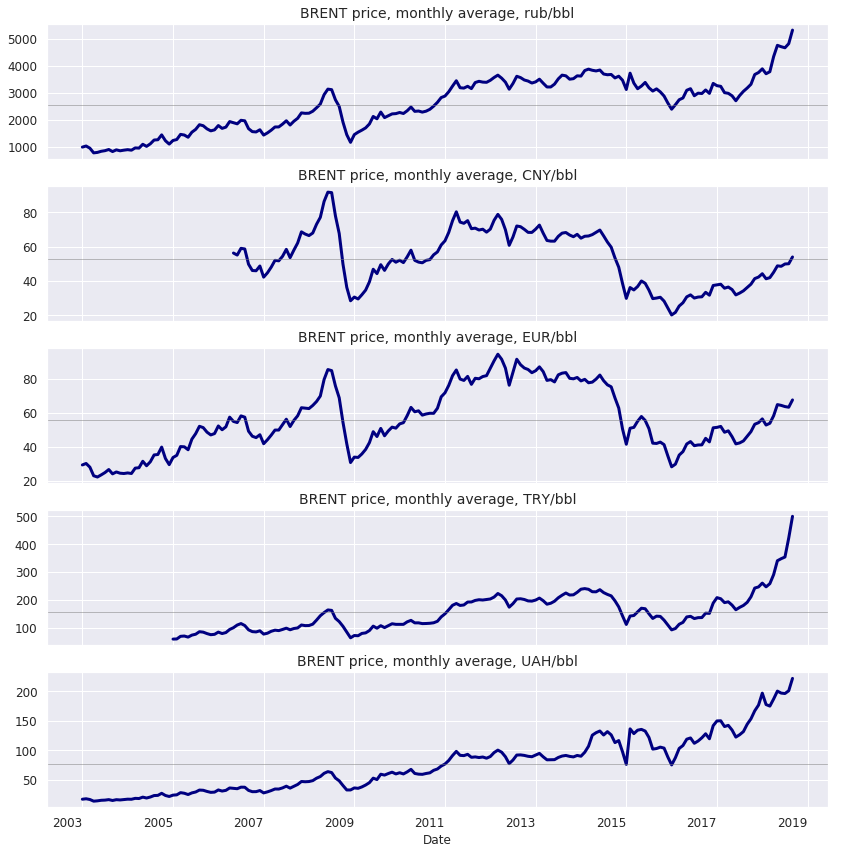

In [36]:
figB, axB=plt.subplots(figsize=(14,16))
pdfB_C=pd.read_sql('select * from BRENT_CURR', eng_co).set_index('Date')


pdfB_C=FuelsDataFrame(pdfB_C)
pdfB_C.index_to_datetime()
#print(pdfB_C)

axBR, axBY, axBU, axTRY, axBUK=pdfB_C.plot.line(ax=axB, grid=True, legend=False, color='navy', lw=3, fontsize=12, 
                         sharex=True, subplots=True, rot=0)
axBR.set_title('BRENT price, monthly average, rub/bbl', fontsize=14)
axBR.axhline(y=pdfB_C['price_rub'].mean(), color='grey', linewidth=0.5)
axBY.set_title('BRENT price, monthly average, CNY/bbl', fontsize=14)
axBY.axhline(y=pdfB_C['price_yuan'].mean(), color='grey', linewidth=0.5)
axBU.set_title('BRENT price, monthly average, EUR/bbl', fontsize=14)
axBU.axhline(y=pdfB_C['price_euro'].mean(), color='grey', linewidth=0.5)

axTRY.set_title('BRENT price, monthly average, TRY/bbl', fontsize=14)
axTRY.axhline(y=pdfB_C['price_tlira'].mean(), color='grey', linewidth=0.5)

axBUK.set_title('BRENT price, monthly average, UAH/bbl', fontsize=14)
axBUK.axhline(y=pdfB_C['price_grivna'].mean(), color='grey', linewidth=0.5)

plt.show();

# 